In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

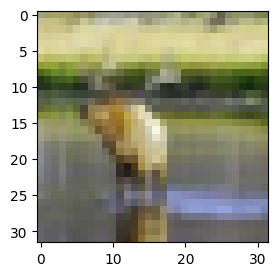

In [5]:
plt.figure(figsize=(10,3))
plt.imshow(X_train[89])
plt.show()

In [6]:
y_train[0:5]  #here we can see it is a 2D array we dont need 2D instead 6 is in a array we need simply 6
              #so we need to reshape it
              #here 6 means the frog

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_train = y_train.reshape(-1,)  #here -1 means we dont need to change the first dimension eg 10000
                                #second is u need to flattern instead 6 in a array u need just 6 so leave it blank
y_train[0:5]                    #now instaed of 2D array we got 1D array

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
def plot_sample(X,y,index):
    plt.figure(figsize=(10,3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

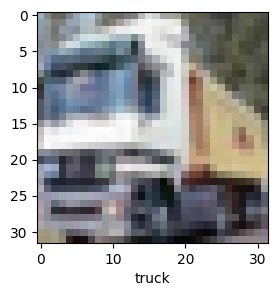

In [10]:
a=int(input("Enter a number:"))
plot_sample(X_train,y_train,a)

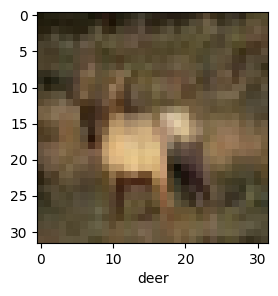

In [11]:
plot_sample(X_train,y_train,3)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

ann.fit(X_train,y_train,epochs=5)



Epoch 1/5


1563/1563 [==============================] - 53s 34ms/step - loss: 1.8071 - accuracy: 0.3597
Epoch 2/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.6180 - accuracy: 0.4287
Epoch 3/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.5389 - accuracy: 0.4571
Epoch 4/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4780 - accuracy: 0.4776
Epoch 5/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4301 - accuracy: 0.4969


In [14]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.5975 - accuracy: 0.4348


[1.597540020942688, 0.43479999899864197]

In [15]:
from sklearn.metrics import classification_report
y_pred = ann.predict(X_test)
y_pred_class = [np.argmax(i) for i in y_pred]
print("Classification report \n",classification_report(y_test,y_pred_class))

313/313 [==============================] - 2s 6ms/step
Classification report 
               precision    recall  f1-score   support

           0       0.65      0.35      0.46      1000
           1       0.32      0.81      0.46      1000
           2       0.52      0.15      0.23      1000
           3       0.35      0.23      0.28      1000
           4       0.56      0.26      0.35      1000
           5       0.34      0.49      0.40      1000
           6       0.50      0.52      0.51      1000
           7       0.70      0.38      0.49      1000
           8       0.50      0.69      0.58      1000
           9       0.43      0.48      0.45      1000

    accuracy                           0.43     10000
   macro avg       0.49      0.43      0.42     10000
weighted avg       0.49      0.43      0.42     10000



In [16]:
# now use CNN to improve the accuracy

In [17]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32 , kernel_size = (3,3) , input_shape=(32,32,3) , activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 32 , kernel_size = (3,3) , input_shape=(32,32,3) , activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [18]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [19]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5149 - accuracy: 0.4544
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2135 - accuracy: 0.5694
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0884 - accuracy: 0.6184
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0042 - accuracy: 0.6498
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9442 - accuracy: 0.6689
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8908 - accuracy: 0.6907
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8537 - accuracy: 0.7003
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8156 - accuracy: 0.7147
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7843 - accuracy: 0.7249
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.756

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9764 - accuracy: 0.6722


[0.9764000773429871, 0.6722000241279602]

In [21]:
y_test[0:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [22]:
y_test = y_test.reshape(-1,)
y_test[0:5]

array([3, 8, 8, 0, 6], dtype=uint8)

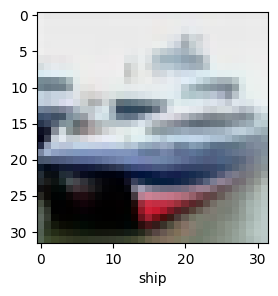

In [23]:
plot_sample(X_test,y_test,1)

In [24]:
y_pred = cnn.predict(X_test)
y_pred_class = [np.argmax(j) for j in y_pred]
y_pred_class[0:5]


313/313 [==============================] - 1s 2ms/step


[3, 8, 8, 0, 6]

In [25]:
y_test[0:5]

array([3, 8, 8, 0, 6], dtype=uint8)

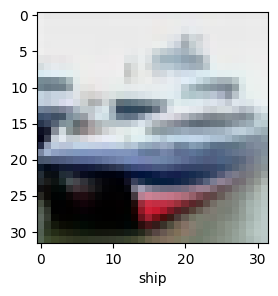

In [26]:
plot_sample(X_test,y_test,1)

In [27]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [28]:
classes[y_pred_class[1]]

'ship'

In [29]:
print("Classification Report:\n",classification_report(y_test,y_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.77      0.72      1000
           1       0.79      0.81      0.80      1000
           2       0.45      0.72      0.55      1000
           3       0.49      0.52      0.50      1000
           4       0.68      0.57      0.62      1000
           5       0.63      0.51      0.56      1000
           6       0.81      0.69      0.75      1000
           7       0.80      0.65      0.71      1000
           8       0.76      0.81      0.79      1000
           9       0.83      0.69      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.68     10000
weighted avg       0.69      0.67      0.68     10000

